In [1]:
import numpy as np
import matplotlib.pylab as plt
import pickle
from scipy import signal
from apis.imaging_classes import save_disp_imgs

# Load saved surface wave windows associated with vehicle states and speeds

In [2]:
# Define the file name using an f-string to include the value of _x0: pivot.
_x0 = 700
tracking_offset = 150
_start_x = _x0 - tracking_offset
_end_x = _x0 + tracking_offset
file_name = f"data/sw_data/{_x0}.pkl"

# Open the file in binary read mode
with open(file_name, "rb") as f:
    # Load the pickled data from the file.
    windows_all = pickle.load(f)  # Load the 'windows_all' surface wave window data from the file.
    das_veh_states = pickle.load(f)  # Load the 'das_veh_states' data from the file.
    veh_speed = pickle.load(f)  # Load the 'veh_speed' data from the file.

# Get surface wave windows with different vehicle weights

## Use majority vehicle speeds

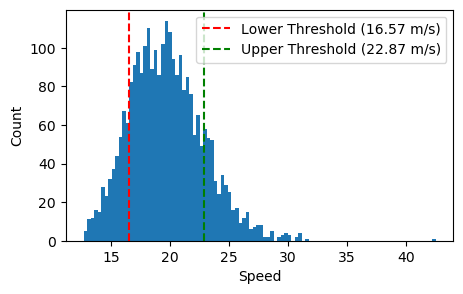

In [9]:
# Define threshold values based on one sigma away from the mode.
lower_limit = np.mean(veh_speed) - 1*sigma
upper_limit = np.mean(veh_speed) + 1*sigma
# Define a condition to select speeds within one sigma of the mode.
speed_idx = np.where((veh_speed >= lower_limit) & (veh_speed <= upper_limit))[0]

# Create a histogram of vehicle speeds.
fig = plt.figure(figsize=(5, 3))
plt.hist(veh_speed, bins=100)
plt.xlabel('Speed')
plt.ylabel('Count')
# Plot vertical lines to mark the threshold values.
plt.axvline(lower_limit, color='r', linestyle='--', label=f'Lower Threshold ({lower_limit:.2f} m/s)')
plt.axvline(upper_limit, color='g', linestyle='--', label=f'Upper Threshold ({upper_limit:.2f} m/s)')
# Create a legend to label the threshold lines.
plt.legend()

# Filter das_veh_states_mean and windows_all_rm to only include elements with matching indices in speed_idx.
das_veh_states = [i for j, i in enumerate(das_veh_states) if j in speed_idx]
windows_all = [i for j, i in enumerate(windows_all) if j in speed_idx]

## Spliting small, mid, and large weight vehicles

In [10]:
# Calculate the mean along the first axis
das_veh_states_mean = []
for das_veh in das_veh_states:
    mean_tmp = signal.detrend(signal.savgol_filter(das_veh.mean(0),101,3))
    mean_tmp = mean_tmp-mean_tmp[0]
    das_veh_states_mean.append(mean_tmp)

Number of Heavy Peaks: 51
Number of Mid Peaks: 892
Number of Small Peaks: 347


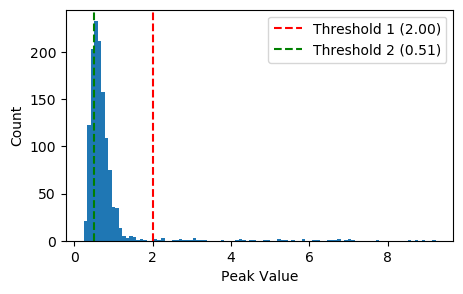

In [11]:
# Calculate the peaks of the mean values.
peaks = np.max(np.abs(das_veh_states_mean), 1)

# Create a histogram of the peaks.
fig = plt.figure(figsize=(5, 3))
n, bins, patches = plt.hist(peaks, bins=100)
plt.xlabel('Peak Value')
plt.ylabel('Count')

# Calculate the mode of the peak values.
mode_peak = bins[np.argmax(n)]
# Define the threshold values.
threshold_1 = 2
threshold_2 = mode_peak
# Plot vertical lines to mark the thresholds.
plt.axvline(threshold_1, color='r', linestyle='--', label=f'Threshold 1 ({threshold_1:.2f})')
plt.axvline(threshold_2, color='g', linestyle='--', label=f'Threshold 2 ({threshold_2:.2f})')
# Create a legend to label the threshold lines.
plt.legend()

# Classify peaks into heavy, mid, and small based on the conditions.
heavy_idx = np.where(peaks > threshold_1)[0]
mid_idx = np.where((peaks <= threshold_1) & (peaks > threshold_2))[0]
light_idx = np.where(peaks <= threshold_2)[0]

# Print the number of elements in each category.
print(f'Number of Heavy Peaks: {len(heavy_idx)}')
print(f'Number of Mid Peaks: {len(mid_idx)}')
print(f'Number of Small Peaks: {len(light_idx)}')

In [12]:
windows_heavy = []  # For peaks greater than 2.
windows_mid = []    # For peaks less than or equal to 2 but greater than mode.
windows_light = []  # For peaks smaller than mode.

# Iterate through heavy_idx, mid_idx, and small_idx to collect corresponding surface wave windows.
for k in heavy_idx:
    windows_heavy.append(windows_all[k])
for k in mid_idx:
    windows_mid.append(windows_all[k])
for k in light_idx:
    windows_light.append(windows_all[k])

# Imaging for different weights

## Plot

figures/700/sg_heavy_cars.png has saved...
saving figures/700/disp_heavy_cars_no_norm.png...
saving figures/700/disp_heavy_cars_no_enhance.png...
saving figures/700/disp_heavy_cars.png...
figures/700/sg_mid_cars.png has saved...
saving figures/700/disp_mid_cars_no_norm.png...
saving figures/700/disp_mid_cars_no_enhance.png...
saving figures/700/disp_mid_cars.png...
figures/700/sg_light_cars.png has saved...
saving figures/700/disp_light_cars_no_norm.png...
saving figures/700/disp_light_cars_no_enhance.png...
saving figures/700/disp_light_cars.png...


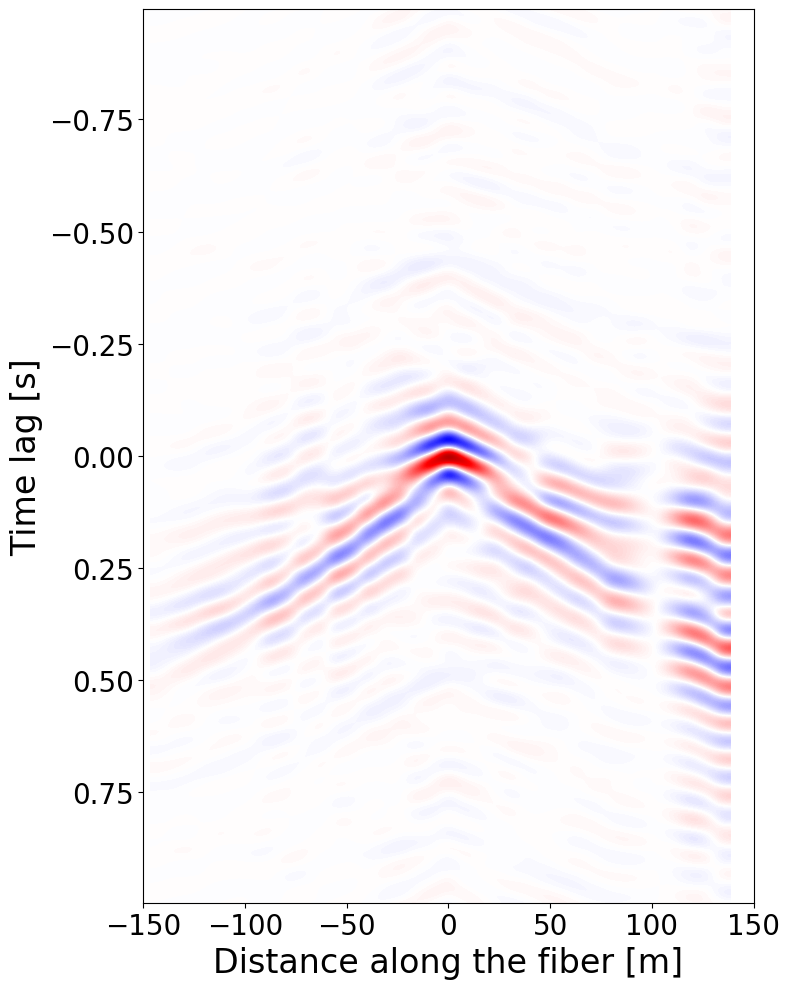

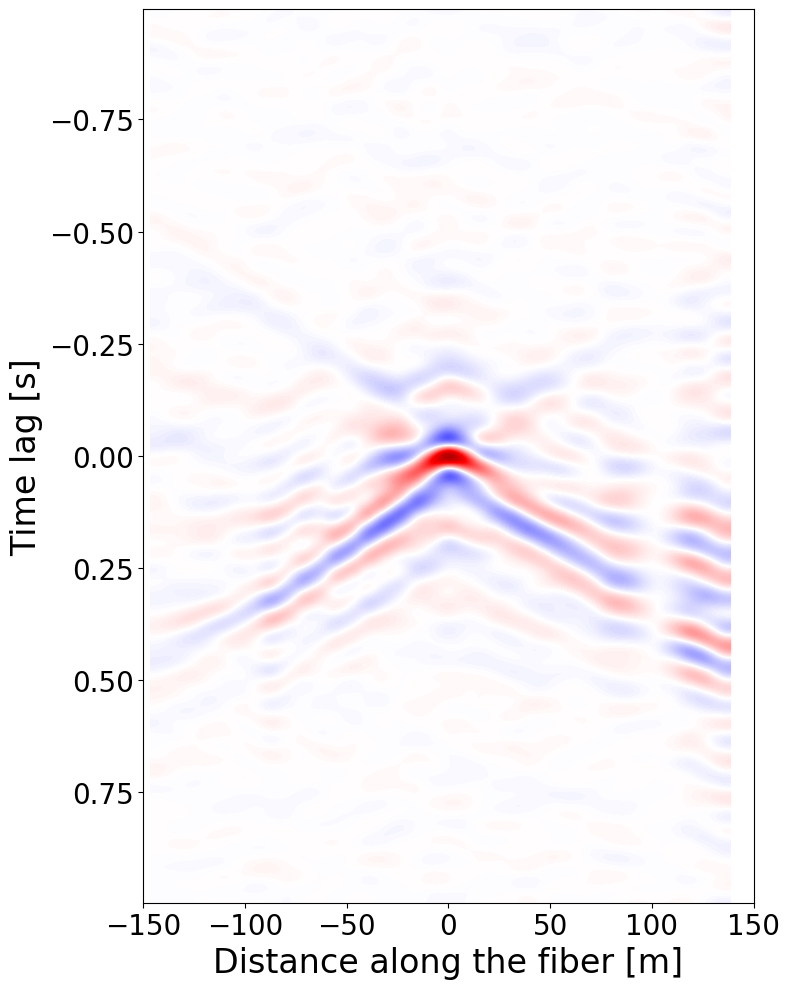

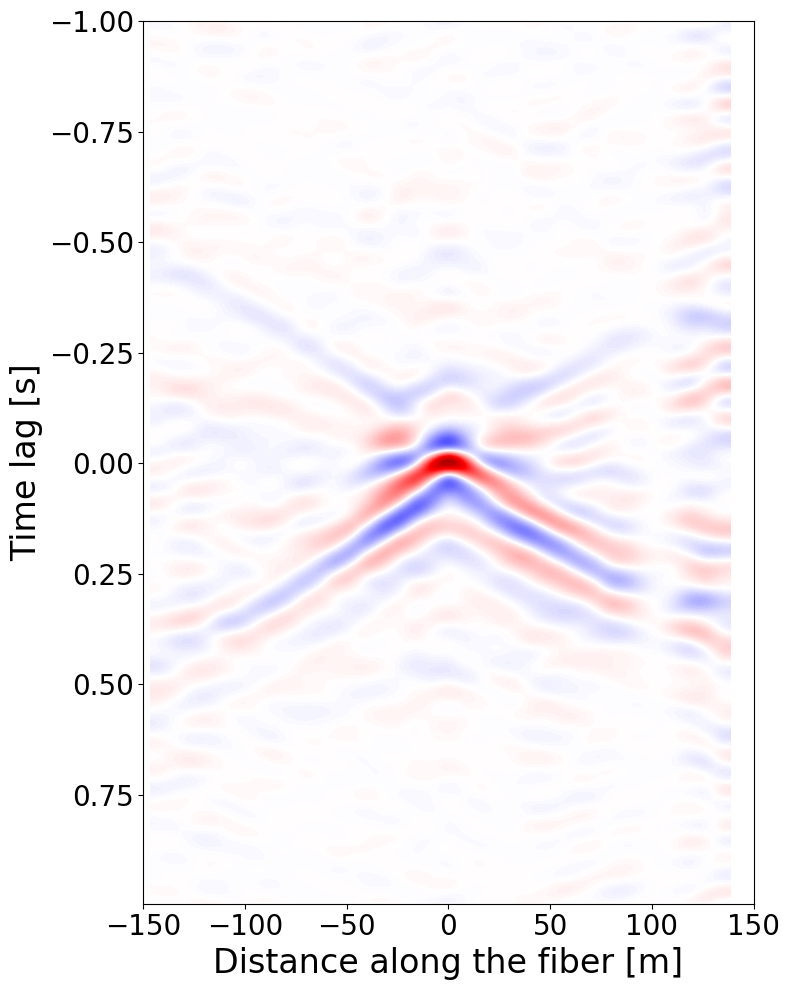

In [13]:
_min_win = np.min([len(heavy_idx),len(mid_idx),len(light_idx)])
images_heavy = save_disp_imgs(windows_heavy, 'heavy', _min_win, _x0, _start_x, _end_x, tracking_offset, fig_dir='figures')
images_mid = save_disp_imgs(windows_mid, 'mid', _min_win, _x0, _start_x, _end_x, tracking_offset, fig_dir='figures')
images_light = save_disp_imgs(windows_light, 'light', _min_win, _x0, _start_x, _end_x, tracking_offset, fig_dir='figures')

## Save image files

In [14]:
file_name = f'data/saved_disp/{_x0}_images_weights.pkl'
with open(file_name, 'wb') as file:
    pickle.dump(images_heavy, file)
    pickle.dump(images_mid, file)
    pickle.dump(images_light, file)
    print(f'Object successfully saved to "{file_name}"')

Object successfully saved to "data/saved_disp/700_images_weights.pkl"
